# Lamane DIENG

# Projet Final

## Problematique

*Analyse des types et de la qualité des vins*

Les jeux de données utilisés dans ce chapitre sont disponibles dans le référentiel UCI Machine Learning très populaire sous le nom de Wine Quality Data Set. Vous pouvez accéder à plus de détails sur https://archive.ics.uci.edu/ml/datasets/wine+quality, qui vous donne accès aux ensembles de données brutes ainsi que des détails sur les différentes fonctionnalités des ensembles de données. Il existe deux ensembles de données, l'un pour les vins rouges et l'autre pour les vins blancs. Pour être plus précis, les ensembles de données sur le vin sont liés à des échantillons de vin rouge et blanc vinho verde, du nord du Portugal. Un autre fichier de la même page Web décrit les détails des ensembles de données, y compris les informations d'attribut. 

## Objectifs

Vos principaux objectifs consistent a résoudre les problèmes majeurs suivants en tirant parti du Machine Learning et de l'analyse des données sur notre ensemble de données sur la qualité du vin.
* 1. Prédir si chaque échantillon de vin est un vin rouge ou blanc.
* 2. Prédir la qualité de chaque échantillon de vin, qui peut être faible, moyenne ou élevée.

## Travail de l'etudiant

* **1. Analyse Exploratoire** -- 
reference: chapitre 3
* **2. Preparation des donnees** -- 
reference: chapitre 4
* **3. Training, Evaluation et Selection de Modele du Type de Vin** --
reference: chapitre 5 et 6
* **4. Training, Evaluation et Selection du Modele du la Qualite de Vin** --  
reference: chapitre 5 et 6

Le tout dans un projet poetry nommer wine-<initial+name>: par exemple pour moi ca sera `wine-ftall`

### Importation Librairies

In [44]:
import pandas as pd
import matplotlib as plt


## Data Collection

In [9]:
#data wine white
data_wwhite = pd.read_csv("../dataset/winequality-white.csv", sep=";")

In [11]:
#data wine red
data_wred = pd.read_csv("../dataset/winequality-red.csv", sep=";")

In [13]:
data_wwhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
data_wred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
data_wwhite.shape

(4898, 12)

In [16]:
data_wwhite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [22]:
data_wred.shape

(1599, 12)

In [17]:
data_wred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
data_wwhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [19]:
data_wred.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Preparing

In [94]:
# bases concatenation
data_wwhite['color'] = "White"
data_wred['color'] = "Red"
data = pd.concat([data_wwhite , data_wred])
data.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [29]:
# Rename columns
data_work = data.rename(columns = {'fixed acidity': 'fixed_acidity',
                                           'volatile acidity':'volatile_acidity',
                                           'residual sugar':'residual_sugar',
                                           'citric acid':'citric_acid',
                                           'free sulfur dioxide':'free_sulfur_dioxide',
                                           'total sulfur dioxide':'total_sulfur_dioxide'}, inplace = False)

In [30]:
data_work.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [31]:
data_work.shape

(6497, 13)

In [40]:
#differents values of quality variable
data_work.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [54]:
for col in data_work.columns.values:
    print("Number of unique values of {} : {}".format(col,data_work[col].nunique()))

Number of unique values of fixed_acidity : 106
Number of unique values of volatile_acidity : 187
Number of unique values of citric_acid : 89
Number of unique values of residual_sugar : 316
Number of unique values of chlorides : 214
Number of unique values of free_sulfur_dioxide : 135
Number of unique values of total_sulfur_dioxide : 276
Number of unique values of density : 998
Number of unique values of pH : 108
Number of unique values of sulphates : 111
Number of unique values of alcohol : 111
Number of unique values of quality : 7
Number of unique values of color : 2


# Data Analysis

## Data Exploration white wine

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='quality', ylabel='count'>

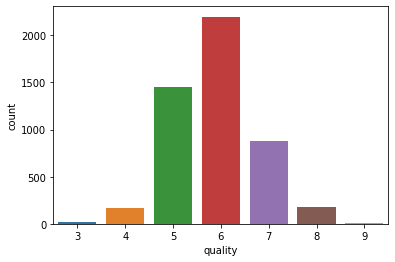

In [75]:
sns.countplot(x = 'quality', data = data_wwhite)

La qualité la plus representée est la qualité **6** avec plus de 44% 

frequality = data_wwhite['quality'].value_counts()
list(frequality)

In [100]:
freq = [i/sum(list(frequality)) for i in list(frequality)]
freq

[0.44875459371171905,
 0.2974683544303797,
 0.17966516945692118,
 0.03572886892609228,
 0.03327888934258881,
 0.004083299305839118,
 0.0010208248264597796]

## Data Exploration red wine

<AxesSubplot:xlabel='quality', ylabel='count'>

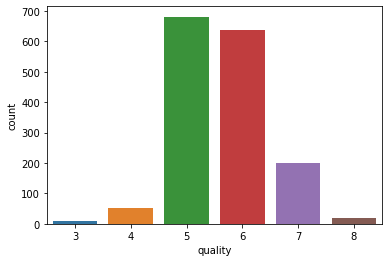

In [101]:
sns.countplot(x = 'quality', data = data_wred)

Pour la qualité du vin rouge, nous constatons une plus forte presence des qualités **5** et **6**   

In [102]:
## Exploration of the concatenated database

/home/muhammad/.cache/pypoetry/virtualenvs/wine-mmboup--XfM-ov7-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/muhammad/.cache/pypoetry/virtualenvs/wine-mmboup--XfM-ov7-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/muhammad/.cache/pypoetry/virtualenvs/wine-mmboup--XfM-ov7-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 90.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/muhammad/.cache/pypoetry/virtualenvs/wine-mmboup--XfM-ov7-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.0% of the points can

Text(0.5, 1.0, 'Wine Quality as explained by Fixed Acidity')

<Figure size 720x432 with 0 Axes>

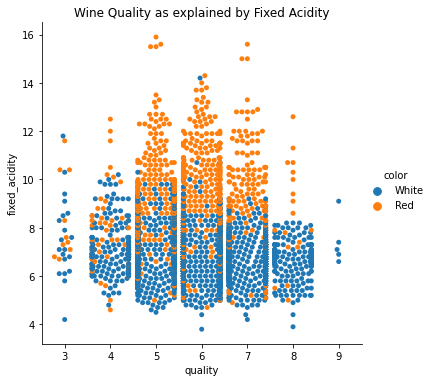

In [103]:
# get some idea of the data
figure = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed_acidity", hue="color", kind="swarm", data=data_work)
plt.title("Wine Quality as explained by Fixed Acidity")

/home/muhammad/.cache/pypoetry/virtualenvs/wine-mmboup--XfM-ov7-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/muhammad/.cache/pypoetry/virtualenvs/wine-mmboup--XfM-ov7-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/muhammad/.cache/pypoetry/virtualenvs/wine-mmboup--XfM-ov7-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/muhammad/.cache/pypoetry/virtualenvs/wine-mmboup--XfM-ov7-py3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 86.3% of the points can

Text(0.5, 1.0, 'Wine Quality as explained by Volatile Acidity')

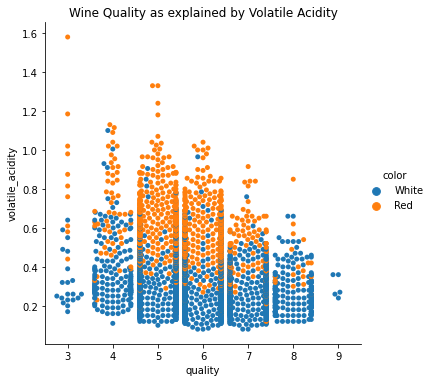

In [106]:
# inspect the relationship between quality and volatile acidity
sns.catplot(x = 'quality', y = 'volatile_acidity', hue="color", kind="swarm", data = data_work)
plt.title("Wine Quality as explained by Volatile Acidity")

In [108]:
from sklearn.model_selection import train_test_split
strata = data_work.quality
wine_train, wine_test = train_test_split(data_work, test_size=0.2, random_state=28, stratify=strata)

In [109]:
wine_train['quality'].value_counts(normalize=True) * 100

6    43.659804
5    32.903598
7    16.605734
4     3.328844
8     2.963248
3     0.461805
9     0.076967
Name: quality, dtype: float64

In [110]:
wine_test['quality'].value_counts(normalize=True) * 100

6    43.615385
5    32.923077
7    16.615385
4     3.307692
8     3.000000
3     0.461538
9     0.076923
Name: quality, dtype: float64

In [112]:
wine_train.to_csv('../dataset/wine_train.csv', index = False)
wine_test.to_csv('../dataset/wine_test.csv', index = False)

In [113]:
recode = {3: 0, 4: 0, 5: 0, 6: 2, 7: 2, 8: 3, 9: 3}
data_work['quality_mark'] = data_work['quality'].map(recode)

In [117]:
target_1 = data_work.quality_mark
features_1 = data_work.drop(['quality','quality_mark','color'], axis=1)

In [118]:
features_1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [120]:
target_1.describe()

count    6497.000000
mean        1.296598
std         1.001804
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: quality_mark, dtype: float64

In [121]:
#Splitting into test and train data
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(features_1, target_1, test_size = 0.2, random_state = 42)

In [122]:
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression(max_iter=10000)
l_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [123]:
l_model.score(X_test, y_test)

0.72

score =72%